# Fake News Detection using Parallel Machine Learning Algorithms

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import time

### Read Data

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

In [7]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
fake["class"] = 0
true["class"] = 1

In [10]:
fake.shape

(23481, 5)

In [11]:
true.shape

(21417, 5)

In [12]:
fake.describe()

,class
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [13]:
true.describe()

,class
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


### Separate Data for Manual Testing

In [14]:
fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    fake.drop([i], axis = 0, inplace = True)
    
true_manual_testing = true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i], axis = 0, inplace = True)

In [15]:
fake.shape 

(23471, 5)

In [16]:
true.shape

(21407, 5)

In [17]:
fake_manual_testing.head(10)


,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [18]:
true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Combine the true and fake datasets

In [19]:
total_data = pd.concat([fake, true], axis =0 )
total_data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [20]:
total_data.tail(10)

,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [21]:
total_data.shape

(44878, 5)

In [22]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 21406
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44878 non-null  object
 1   text     44878 non-null  object
 2   subject  44878 non-null  object
 3   date     44878 non-null  object
 4   class    44878 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Data Shuffling

In [23]:
total_data = total_data.sample(frac=1).reset_index(drop=True)

In [24]:
total_data.head(15)

,title,text,subject,date,class
0,UK Brexit bill not scheduled for debate in par...,LONDON (Reuters) - Britain s parliament will n...,worldnews,"October 19, 2017",1
1,Trump's 'Paterno' comment sparks jeers on soci...,(Reuters) - Republican presidential front-runn...,politicsNews,"April 14, 2016",1
2,President Obama: Hillary Clinton Is Undoubted...,Hillary Clinton was one of the most hands-on F...,News,"April 7, 2016",0
3,After year of mourning Thailand's 'floating ba...,BANGKOK (Reuters) - People in Thailand celebra...,worldnews,"November 3, 2017",1
4,COLLUSION FUSION: DOJ Official’s CIA Wife Was ...,21st Century Wire says More evidence of collus...,Middle-east,"December 14, 2017",0
5,BOOM! TRUMP Holds “DISHONEST MEDIA” Accountabl...,Kellyanne Conway met with NBC s Meet The Pres...,left-news,"Jan 8, 2017",0
6,Philippines president says China agrees to wor...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"November 14, 2017",1
7,Intelligence Committee Warns Trump: Produce W...,"Last Saturday, Donald Trump woke at the crack ...",News,"March 12, 2017",0
8,AMERICANS EXPECTED OBAMA TO CALL FOR CALM…Inst...,Isn t it the job of the CURRENT president to c...,left-news,"Nov 14, 2016",0
9,"Securities, commodities regulators press U.S. ...",WASHINGTON (Reuters) - The heads of the U.S. a...,politicsNews,"April 12, 2016",1


In [25]:
total_data.tail(15)

,title,text,subject,date,class
44863,"Flynn's lawyers cut talks with Trump team, sig...",WASHINGTON (Reuters) - Lawyers for Michael Fly...,politicsNews,"November 23, 2017",1
44864,Killer of South African anti-apartheid leader ...,JOHANNESBURG (Reuters) - South Africa s Justic...,worldnews,"November 17, 2017",1
44865,Brokeback Bundy: Hilarious Hashtag Mocks What...,The Bundy brothers and their militia continue ...,News,"January 7, 2016",0
44866,"BOILER ROOM – EP #43 – Cloppers, OR Osmosis, M...",Tune in to the Alternate Current Radio Network...,US_News,"February 11, 2016",0
44867,Clinton's IT aide to plead the Fifth in email ...,WASHINGTON (Reuters) - The man believed to hav...,politicsNews,"June 1, 2016",1
44868,Kenyan election commission sets Oct. 17 as dat...,NAIROBI (Reuters) - Kenya s election commissio...,worldnews,"September 4, 2017",1
44869,ZING! Sarah Sanders Slices and Dices Hack Repo...,You d think reporters would learn to ask quest...,politics,"Nov 17, 2017",0
44870,BLACK PANTHERS AND BROWN BERETS Crash Trump Ra...,Portland State University held its second Stud...,politics,"Apr 17, 2016",0
44871,Gretchen Carlson Fired From Fox News For Refu...,The offices at Fox News are in what amounts to...,News,"July 6, 2016",0
44872,U.S. and China align over North Korea sanction...,WASHINGTON (Reuters) - The White House said on...,politicsNews,"February 25, 2016",1


### Check for any missing values

In [26]:
total_data.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

### Dropping the Columns

In [27]:
final = total_data.drop(["title", "subject","date"], axis = 1)

In [28]:
final.shape

(44878, 2)

In [29]:
final.head(10)

,text,class
0,LONDON (Reuters) - Britain s parliament will n...,1
1,(Reuters) - Republican presidential front-runn...,1
2,Hillary Clinton was one of the most hands-on F...,0
3,BANGKOK (Reuters) - People in Thailand celebra...,1
4,21st Century Wire says More evidence of collus...,0
5,Kellyanne Conway met with NBC s Meet The Pres...,0
6,MANILA (Reuters) - Philippine President Rodrig...,1
7,"Last Saturday, Donald Trump woke at the crack ...",0
8,Isn t it the job of the CURRENT president to c...,0
9,WASHINGTON (Reuters) - The heads of the U.S. a...,1


In [30]:
final.reset_index(inplace = True)
final.drop(["index"], axis = 1, inplace = True)

In [31]:
final.isnull().sum()

text     0
class    0
dtype: int64

### Count Plot

<AxesSubplot:xlabel='class', ylabel='count'>

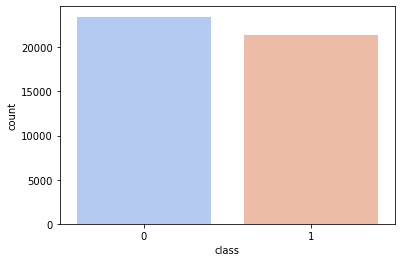

In [32]:
sns.countplot(data = final, x='class',
              order = final['class'].value_counts().index, palette ='coolwarm')

### Function to convert the text in lowercase, remove the extra space, special characters, ulr and links.

In [33]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [34]:
final["text"] = final["text"].apply(wordopt)

In [35]:
import nltk

### Bar Graph for top 20mostly used words

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

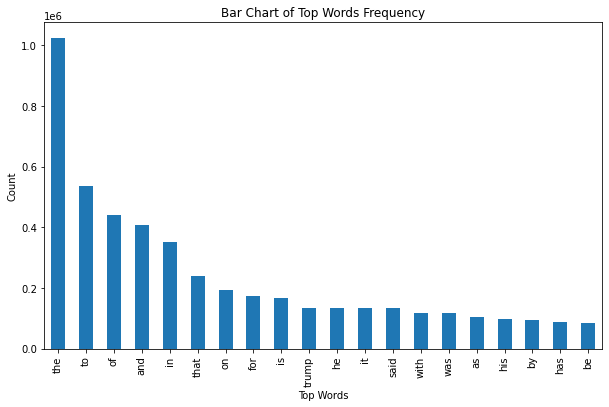

In [36]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(final['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


### Dependent and Independent Variables

In [37]:
X = final["text"]
Y = final["class"]

### Splitting the data into training and testing

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Converting Text into Vectors

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

# K- Nearest Neighbor Algorithm

In [79]:
from sklearn.neighbors import KNeighborsClassifier

#Serial implementation of KNN

def knn(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

start_time = time.time()
y_pred_serial = knn(XV_train, Y_train, XV_test, 5)
end_time = time.time()
print('Serial execution time:', end_time - start_time)

Serial execution time: 90.80879497528076


In [87]:
# Accuracy
Serial_Accuracy = accuracy_score(Y_test, y_pred_serial)

print(f" Serial Accuracy: {Serial_Accuracy}")

 Serial Accuracy: 0.6881461675579322


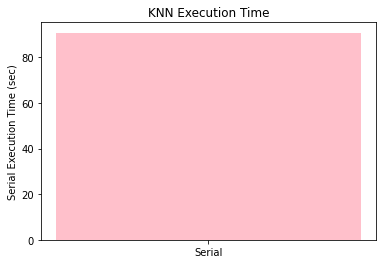

In [108]:
# Barplot for serial execution of KNN
labels = ['Serial']
times = [end_time - start_time]
fig, ax = plt.subplots()
ax.bar(labels, times, color = ['pink'])
ax.set_ylabel('Serial Execution Time (sec)')
ax.set_title('KNN Execution Time')
plt.show()

### Parallel Implementation of KNN

In [86]:
from joblib import Parallel, delayed


def parallel_knn(X_train, y_train, X_test, k, n_jobs):
    predictions = Parallel(n_jobs=n_jobs)(delayed(knn)(X_train, y_train, X_test, k) for i in range(n_jobs))
    return np.concatenate(predictions)

# Parallel execution
StartTime = time.time()
y_pred_parallel = parallel_knn(XV_train, Y_train, XV_test, 5, n_jobs=1)
EndTime = time.time()
print('Parallel Execution Time:', EndTime - StartTime)

Parallel Execution Time: 88.33035445213318


In [88]:
# Accuracy
Parallel_Accuracy = accuracy_score(Y_test, y_pred_parallel)
print(f" Parallel Accuracy: {Parallel_Accuracy}")

 Parallel Accuracy: 0.6881461675579322


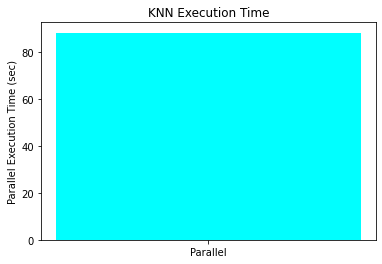

In [107]:
# Bar Plot for Parallel execution time
labels = ['Parallel']
times = [EndTime - StartTime]
fig, ax = plt.subplots()
ax.bar(labels, times, color = ['cyan'])
ax.set_ylabel('Parallel Execution Time (sec)')
ax.set_title('KNN Execution Time')
plt.show()

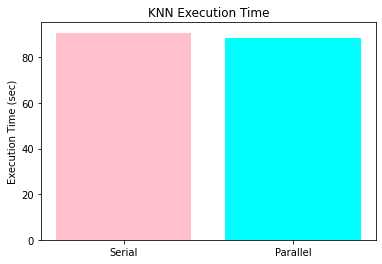

In [106]:
# Bar Plot for both Serial and Parallel execution times
labels = ['Serial', 'Parallel']
times = [end_time - start_time, EndTime - StartTime]
fig, ax = plt.subplots()
ax.bar(labels, times, color=['pink', 'cyan'])
ax.set_ylabel('Execution Time (sec)')
ax.set_title('KNN Execution Time')
plt.show()

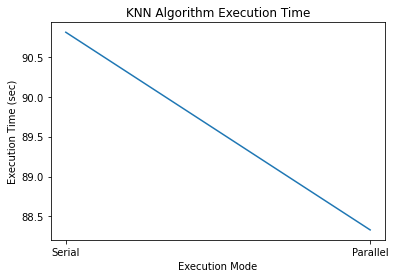

In [110]:
# Line Plot for Serial and Parallel Execution times 
x = ['Serial', 'Parallel']
y = [end_time - start_time, EndTime - StartTime]
plt.plot(x, y)
plt.xlabel('Execution Mode')
plt.ylabel('Execution Time (sec)')
plt.title('KNN Algorithm Execution Time')
plt.show()

### Observation:

#### 1. From the execution times of the serial and parallel implementation of KNN algorithm, we can observe that the parallel implementation of KNN is faster than the serial execution. Though the difference between the serial and parallel executions are only 2 minutes approximately. We can understand that parallel implementation is some what faster. 

#### 2. From this we can understand, that when we have a large datasets, the parallel implementation has faster processing times. 

#### 3. Also, We observed that there is no change in accuracies of both the models.

### Classification Report

In [98]:
# Serial
print(classification_report(Y_test, y_pred_serial))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      5838
           1       0.94      0.37      0.54      5382

    accuracy                           0.69     11220
   macro avg       0.78      0.68      0.65     11220
weighted avg       0.78      0.69      0.66     11220



In [99]:
#Parallel
print(classification_report(Y_test, y_pred_parallel))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77      5838
           1       0.94      0.37      0.54      5382

    accuracy                           0.69     11220
   macro avg       0.78      0.68      0.65     11220
weighted avg       0.78      0.69      0.66     11220



### Confusion Matrix

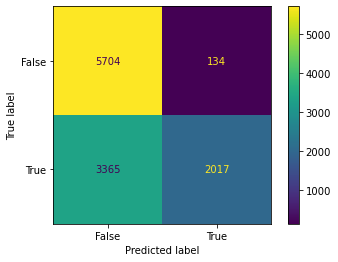

In [100]:
#Serial
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_pred_serial)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

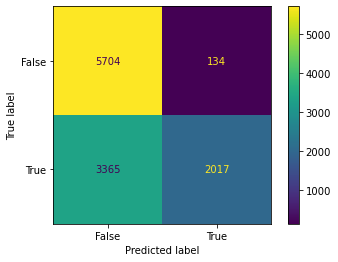

In [101]:
#Parallel
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, y_pred_parallel)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

# Random Forest Algorithm

In [112]:
# Serial Implementation
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
RFC.fit(XV_train, Y_train)
end_time = time.time()
print("Training Time (sec):", end_time - start_time)

Training Time (sec): 149.8572962284088


In [114]:
start_time1 = time.time()
pred_rfc = RFC.predict(XV_test)
end_time1 = time.time()
print("Prediction Time (sec):", end_time1 - start_time1)

Prediction Time (sec): 2.489135503768921


In [115]:
Serial_Time = end_time - start_time + end_time1 - start_time1
print(f"Serial Execution Time is {Serial_Time}")

Serial Execution Time is 152.34643173217773


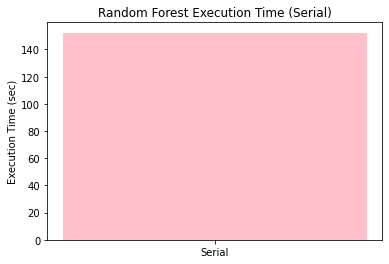

In [131]:
# Barplot for serial execution time
labels = ['Serial']
times = [Serial_Time]
fig, ax = plt.subplots()
ax.bar(labels, times, color = ['pink'])
ax.set_ylabel('Execution Time (sec)')
ax.set_title('Random Forest Execution Time (Serial)')
plt.show()

In [135]:
# Accuracy
RFC.score(XV_test, Y_test)

0.9875222816399287

In [124]:
# Parallel

from joblib import Parallel, delayed


def train_rf(X, y):
    clf = RandomForestClassifier()
    clf.fit(X, y)
    return clf

# Set the number of parallel jobs
n_jobs = 4

# Train the random forest classifier in parallel and time it
start_time_Parallel = time.time()
results = Parallel(n_jobs=n_jobs)(delayed(train_rf)(XV_train[i:i+XV_train.shape[0]//n_jobs], Y_train[i:i+XV_train.shape[0]//n_jobs]) for i in range(0, XV_train.shape[0], XV_train.shape[0]//n_jobs))
end_time_Parallel = time.time()

Parallel_time = end_time_Parallel - start_time_Parallel


clf = None
for r in results:
    if clf is None:
        clf = r
    else:
        clf.estimators_ += r.estimators_
        
    

print("Training time: {:.4f} seconds".format(Parallel_time))

Training time: 45.4249 seconds


In [127]:
start_time1 = time.time()
y_pred = clf.predict(XV_test)
end_time1 = time.time()
print(end_time1 - start_time1)

10.932310342788696


In [128]:
ParallelTime = Parallel_time + (end_time1 - start_time1)
print(ParallelTime)

56.35716891288757


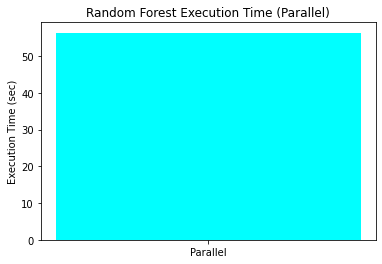

In [129]:
# Barplot for parallel execution time
labels = ['Parallel']
times = [ParallelTime]
fig, ax = plt.subplots()
ax.bar(labels, times, color = ['cyan'])
ax.set_ylabel('Execution Time (sec)')
ax.set_title('Random Forest Execution Time (Parallel)')
plt.show()

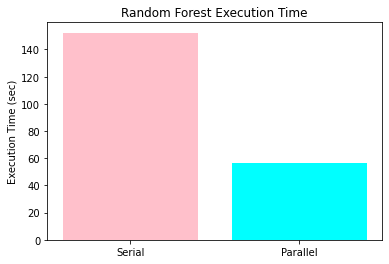

In [130]:
# Barplots for both Serial and Parallel executions of Random Forest Algorithm
labels = ['Serial', 'Parallel']
times = [Serial_Time, ParallelTime]
fig, ax = plt.subplots()
ax.bar(labels, times, color=['pink', 'cyan'])
ax.set_ylabel('Execution Time (sec)')
ax.set_title('Random Forest Execution Time')
plt.show()

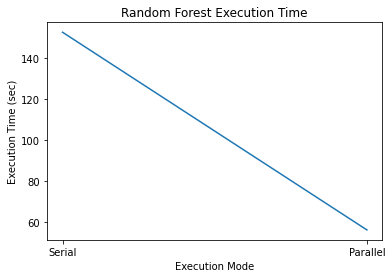

In [132]:
# Line plot for both Serial and Parallel Implementation of Random Forest Model
x = ['Serial', 'Parallel']
y = [Serial_Time, ParallelTime]
plt.plot(x, y)
plt.xlabel('Execution Mode')
plt.ylabel('Execution Time (sec)')
plt.title('Random Forest Execution Time')
plt.show()


## Observation:

#### 1. The serial implementation and execution of Random Forest algorithm took nearly 152 seconds. At the same time, the parallel implementation and execution took nearly 56 seconds.

#### 2. We see that implementing Random Forest algorithm in parallel is approximately 3 times faster than the serial implementation.

#### 3. Comparing the accuracies of both serial and parallel execution, there is only decimal value diiference in both of them. 
#### 4. The precision for serial random forest algorithm got 0.99, while the parallel implementation got 0.98 for class label 0 respectively. 

In [139]:
# Accuracy
Parallel_Accuracy = accuracy_score(Y_test, y_pred)
print(f" Parallel Accuracy: {Parallel_Accuracy:.2f}")

 Parallel Accuracy: 0.99


### Classification Report

In [141]:
#Serial
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5838
           1       0.99      0.98      0.99      5382

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [142]:
# Parallel
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5838
           1       0.99      0.98      0.99      5382

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



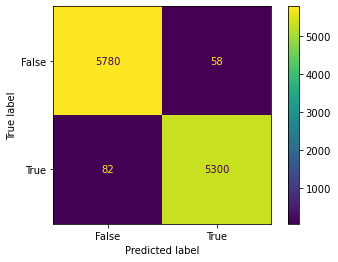

In [143]:
# Confusion matrix 
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, pred_rfc)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])
  
cm_display.plot()
plt.show()

### Manual Testing

In [144]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RFC.predict(new_xv_test)
    y_pred = clf.predict(new_xv_test)

    return print("\n\nRandom Forest Serial Prediction: {} \nRandom Forest Parallel Prediction: {}".format(output_label(pred_RFC[0]), output_label(y_pred[0]) ))

In [145]:
news = str(input())
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d